In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import requests
import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
outfile = "./Data/weatherData.csv"

# Date of analysis
d = datetime.date.today()
date = d.strftime("%B %d, %Y")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?" 

# Capitalize city names for better visual display
citiesCap = [city.title() for city in cities]

# Create lists with relevant values for analysis
lat = []
temp = []
humid = []
cloud = []
wind = []
count = 0
for city in citiesCap:
    # Wrapped in try due to some cities not being present in Open WeatherMap
    try:
        params = {
            'appid' : api_key,
            'q' : city,
            'units' : 'Imperial'
        }
        response = requests.get(url, params=params).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f'Data for {count} - "{city}" found and recorded')
    # Exception handling appends None in lists to keep lists parallel 
    except:
        lat.append(None)
        temp.append(None)
        humid.append(None)
        cloud.append(None)
        wind.append(None)
        print(f'Data for {count} - "{city}" not found, recorded as "None"')
    count += 1

# Print log included of each city as it's being processed with the city number and city name 
# as well as whether it was successful in retrieving data

Data for 0 - "Hofn" found and recorded
Data for 1 - "Punta Arenas" found and recorded
Data for 2 - "Avarua" found and recorded
Data for 3 - "Hilo" found and recorded
Data for 4 - "Rikitea" found and recorded
Data for 5 - "La Union" found and recorded
Data for 6 - "Ribeira Grande" found and recorded
Data for 7 - "Fort Frances" found and recorded
Data for 8 - "Port Hedland" found and recorded
Data for 9 - "Bonavista" found and recorded
Data for 10 - "Nurota" found and recorded
Data for 11 - "Butaritari" found and recorded
Data for 12 - "Vaini" found and recorded
Data for 13 - "Port Alfred" found and recorded
Data for 14 - "Qaanaaq" found and recorded
Data for 15 - "Ushuaia" found and recorded
Data for 16 - "Port Pirie" found and recorded
Data for 17 - "Cape Town" found and recorded
Data for 18 - "Busselton" found and recorded
Data for 19 - "Acarau" not found, recorded as "None"
Data for 20 - "Kawambwa" found and recorded
Data for 21 - "Illoqqortoormiut" not found, recorded as "None"
Data

Data for 179 - "Saint-Augustin" found and recorded
Data for 180 - "Saint-Leu" found and recorded
Data for 181 - "Bilma" found and recorded
Data for 182 - "Chlorakas" not found, recorded as "None"
Data for 183 - "Faanui" found and recorded
Data for 184 - "Goderich" found and recorded
Data for 185 - "Gravdal" found and recorded
Data for 186 - "Port Blair" found and recorded
Data for 187 - "Leningradskiy" found and recorded
Data for 188 - "Asfi" not found, recorded as "None"
Data for 189 - "Divnoye" found and recorded
Data for 190 - "Smithers" found and recorded
Data for 191 - "Kralendijk" found and recorded
Data for 192 - "Airai" found and recorded
Data for 193 - "Cidreira" found and recorded
Data for 194 - "Verkhnyaya Inta" found and recorded
Data for 195 - "Ruatoria" not found, recorded as "None"
Data for 196 - "Mount Isa" found and recorded
Data for 197 - "Jamestown" found and recorded
Data for 198 - "Leh" found and recorded
Data for 199 - "Egvekinot" found and recorded
Data for 200 -

Data for 357 - "Moose Factory" found and recorded
Data for 358 - "Haibowan" not found, recorded as "None"
Data for 359 - "Cap Malheureux" found and recorded
Data for 360 - "Latung" found and recorded
Data for 361 - "Mount Gambier" found and recorded
Data for 362 - "Severo-Kurilsk" found and recorded
Data for 363 - "Pimentel" found and recorded
Data for 364 - "Felidhoo" not found, recorded as "None"
Data for 365 - "Tricase" found and recorded
Data for 366 - "Nucet" found and recorded
Data for 367 - "Tessalit" found and recorded
Data for 368 - "Manadhoo" found and recorded
Data for 369 - "Portland" found and recorded
Data for 370 - "Sabang" found and recorded
Data for 371 - "Ayer Itam" not found, recorded as "None"
Data for 372 - "Hambantota" found and recorded
Data for 373 - "Ixtapa" found and recorded
Data for 374 - "Balkanabat" found and recorded
Data for 375 - "Maamba" found and recorded
Data for 376 - "Nioro" found and recorded
Data for 377 - "Contamana" found and recorded
Data for 

Data for 532 - "Vostok" found and recorded
Data for 533 - "Nhulunbuy" found and recorded
Data for 534 - "Aquin" found and recorded
Data for 535 - "Eyl" found and recorded
Data for 536 - "Chifeng" found and recorded
Data for 537 - "Ninh Binh" found and recorded
Data for 538 - "Nador" found and recorded
Data for 539 - "Katima Mulilo" found and recorded
Data for 540 - "Ojhar" found and recorded
Data for 541 - "Murakami" found and recorded
Data for 542 - "Nouakchott" found and recorded
Data for 543 - "Dakar" found and recorded
Data for 544 - "Biloxi" found and recorded
Data for 545 - "Edgewater" found and recorded
Data for 546 - "Betioky" not found, recorded as "None"
Data for 547 - "Dvinskoy" found and recorded
Data for 548 - "Miles City" found and recorded
Data for 549 - "Kahone" found and recorded
Data for 550 - "Solnechnyy" found and recorded
Data for 551 - "Yerbogachen" found and recorded
Data for 552 - "Chapais" found and recorded
Data for 553 - "Vestmanna" found and recorded
Data fo

In [4]:
# create a data frame from cities, temp, humid, cloud and wind
weatherInfo = {
    "City": citiesCap,
    "Latitude": lat,
    "Temperature (F)": temp,
    "Humidity": humid,
    "Cloud Coverage": cloud,
    "Wind Speed (mph)": wind
}
weatherDF = pd.DataFrame(weatherInfo)

# Drop rows with None as values
weatherDFdropna = weatherDF.dropna(how="any")

# Confirm count
len(weatherDFdropna)

573

In [5]:
# Function for finding and dropping rows with nonsense values (e.g. humidity > 100)
def dropNonsense(dataframe, columnName, minVal, maxVal):
    dropIndices = []
    for index, row in dataframe.iterrows():
        val = dataframe[columnName][index]
        if (maxVal is not None) and (val > maxVal) or (minVal is not None) and (val < minVal):
            dropIndices.append(index)
    return dataframe.drop(index=dropIndices)

In [6]:
# Establish reasonable values for columns
reasonableVals = [
    ("Humidity", 0, 100),
    ("Cloud Coverage", 0, 100),
    ("Wind Speed (mph)", 0, None)
]

# Loop through dataframe to drop nonsense data
weatherDFclean = weatherDFdropna
for entry in reasonableVals:
    weatherDFclean = dropNonsense(weatherDFclean, entry[0], entry[1], entry[2])

# Confirm count
len(weatherDFclean)

573

In [7]:
# Used to check functionality of previous code
weatherDFclean.sort_values(by="Humidity", ascending=False)

,City,Latitude,Temperature (F),Humidity,Cloud Coverage,Wind Speed (mph)
0,Hofn,64.25,43.15,100.0,48.0,8.97
264,Ugoofaaru,5.67,81.04,100.0,36.0,13.44
237,Saint-Paul,45.22,50.86,100.0,75.0,2.48
252,Westport,53.80,48.20,100.0,90.0,13.87
256,Thinadhoo,0.53,82.84,100.0,80.0,9.19
257,Georgetown,6.80,75.20,100.0,0.0,4.70
259,Tasiilaq,65.61,41.53,100.0,92.0,4.38
260,Sorland,67.67,52.51,100.0,44.0,25.64
261,Skibbereen,51.55,57.20,100.0,75.0,13.87
277,Svetlaya,46.54,61.51,100.0,88.0,9.64


In [8]:
# Write dataframe to CSV file
weatherDFclean.to_csv(outfile, index=False, header=True)

In [9]:
plt.rcParams["axes.facecolor"]="black"

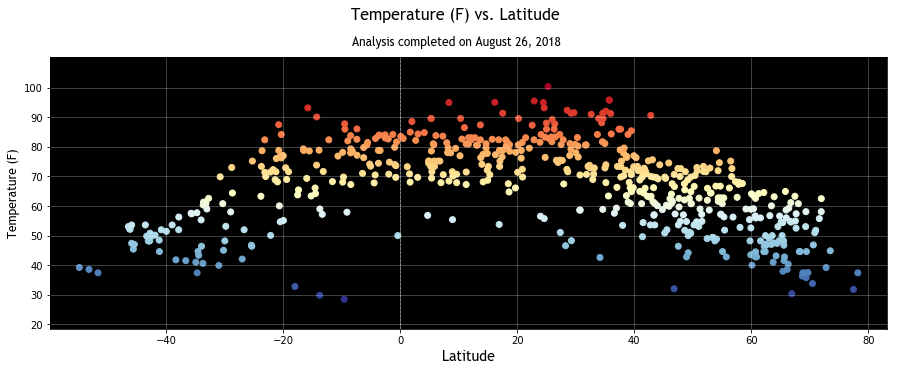

In [10]:
# Temperature (F) vs. Latitude
plt.figure(figsize=(15,5))
plt.tight_layout

# Establish x and y
x = weatherDFclean["Latitude"]
y = weatherDFclean["Temperature (F)"]

plt.scatter(x, y, marker="o", c=y, cmap="RdYlBu_r")

# Labels/Formatting
plt.suptitle("Temperature (F) vs. Latitude", fontsize=16, fontname="Trebuchet MS").set_position([.5, 1.02])
plt.title((f"Analysis completed on {date}"), fontsize=12, fontname="Trebuchet MS").set_position([.485, 1.02])
plt.xlabel("Latitude", fontsize=14, fontname="Trebuchet MS")
plt.ylabel("Temperature (F)", fontsize=12, fontname="Trebuchet MS")
plt.rcParams["axes.facecolor"]="black"
plt.grid(color='white', which='both', linestyle='-', linewidth=.5, fillstyle="bottom", alpha=0.5)
plt.axvline(0, linestyle='--', linewidth=.75, color='white', fillstyle="bottom", alpha=0.5, zorder=0)

# Set x and y limits
plt.xlim(min(x)-5, max(x)+5)
plt.ylim(min(y)-10, max(y)+10)
plt.yticks(range(int(round((min(y)-10), -1)), round(max(y)+10), 10))

# Save figure
plt.savefig("./Images/temp.png")

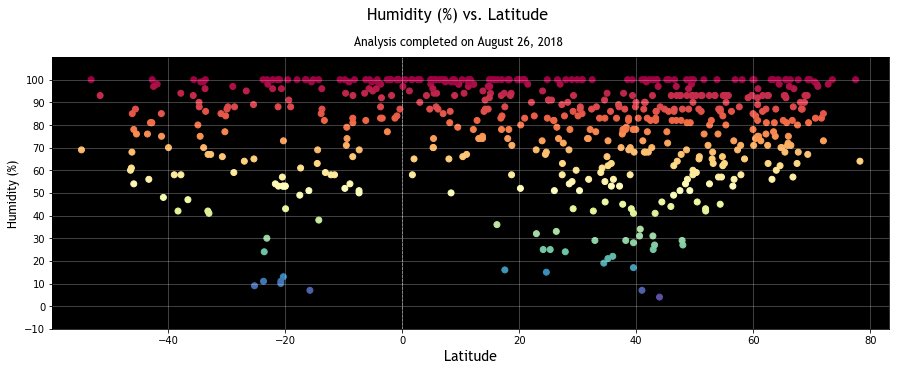

In [11]:
# Humidity (%) vs. Latitude
plt.figure(figsize=(15,5))
plt.tight_layout

# Establish x and y
x = weatherDFclean["Latitude"]
y = weatherDFclean["Humidity"]

plt.scatter(x, y, marker="o", c=y, cmap="Spectral_r")

# Labels/Formatting
plt.suptitle("Humidity (%) vs. Latitude", fontsize=16, fontname="Trebuchet MS").set_position([.5, 1.02])
plt.title((f"Analysis completed on {date}"), fontsize=12, fontname="Trebuchet MS").set_position([.485, 1.02])
plt.xlabel("Latitude", fontsize=14, fontname="Trebuchet MS")
plt.ylabel("Humidity (%)", fontsize=12, fontname="Trebuchet MS")
plt.rcParams["axes.facecolor"]="black"
plt.grid(color='white', which='both', linestyle='-', linewidth=.5, fillstyle="bottom", alpha=0.5)
plt.axvline(0, linestyle='--', linewidth=.75, color='white', fillstyle="bottom", alpha=0.5, zorder=0)

# Set x and y limits
plt.xlim(min(x)-5, max(x)+5)
plt.ylim(min(y)-10, max(y)+10)
plt.yticks(range(int(round((min(y)-10), -1)), round(max(y)+10), 10))

# Save figure
plt.savefig("./Images/humid.png")

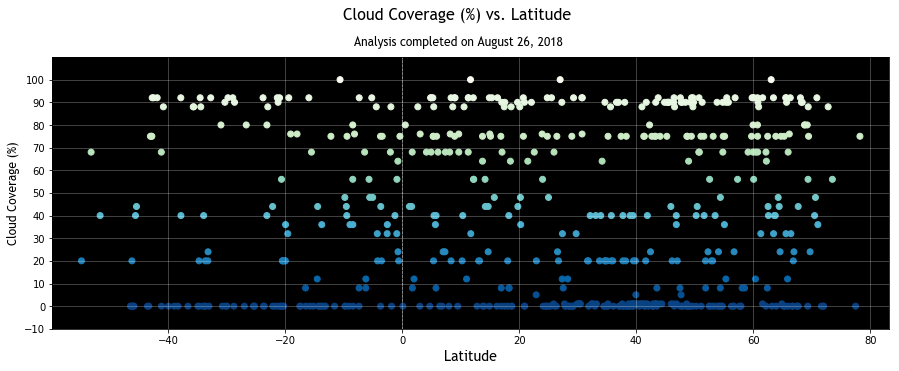

In [12]:
# Cloudiness (%) vs. Latitude
plt.figure(figsize=(15,5))
plt.tight_layout

# Establish x and y
x = weatherDFclean["Latitude"]
y = weatherDFclean["Cloud Coverage"]

plt.scatter(x, y, marker="o", c=y, cmap="GnBu_r")

# Labels/Formatting
plt.suptitle("Cloud Coverage (%) vs. Latitude", fontsize=16, fontname="Trebuchet MS").set_position([.5, 1.02])
plt.title((f"Analysis completed on {date}"), fontsize=12, fontname="Trebuchet MS").set_position([.485, 1.02])
plt.xlabel("Latitude", fontsize=14, fontname="Trebuchet MS")
plt.ylabel("Cloud Coverage (%)", fontsize=12, fontname="Trebuchet MS")
plt.rcParams["axes.facecolor"]="black"
plt.grid(color='white', which='both', linestyle='-', linewidth=.5, fillstyle="bottom", alpha=0.5)
plt.axvline(0, linestyle='--', linewidth=.75, color='white', fillstyle="bottom", alpha=0.5, zorder=0)

# Set x and y limits
plt.xlim(min(x)-5, max(x)+5)
plt.ylim(min(y)-10, max(y)+10)
plt.yticks(range(int(round((min(y)-10), -1)), round(max(y)+10), 10))

# Save figure
plt.savefig("./Images/cloud.png")

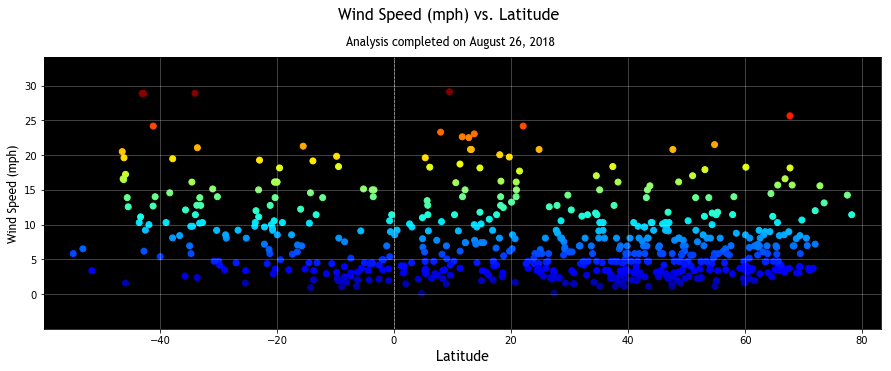

In [13]:
# Wind Speed (mph) vs. Latitude
plt.figure(figsize=(15,5))
plt.tight_layout

# Establish x and y
x = weatherDFclean["Latitude"]
y = weatherDFclean["Wind Speed (mph)"]

plt.scatter(x, y, marker="o", c=y, cmap="jet")

# Labels/Formatting
plt.suptitle("Wind Speed (mph) vs. Latitude", fontsize=16, fontname="Trebuchet MS").set_position([.5, 1.02])
plt.title((f"Analysis completed on {date}"), fontsize=12, fontname="Trebuchet MS").set_position([.485, 1.02])
plt.xlabel("Latitude", fontsize=14, fontname="Trebuchet MS")
plt.ylabel("Wind Speed (mph)", fontsize=12, fontname="Trebuchet MS")
plt.rcParams["axes.facecolor"]="black"
plt.grid(color='white', which='both', linestyle='-', linewidth=.5, fillstyle="bottom", alpha=0.5)
plt.axvline(0, linestyle='--', linewidth=.75, color='white', fillstyle="bottom", alpha=0.5, zorder=0)

# Set x and y limits
plt.xlim(min(x)-5, max(x)+5)
plt.ylim(0-5, max(y)+5)
plt.yticks(range(0, int(round(max(y)+5)), 5))

# Save figure
plt.savefig("./Images/wind.png")